data ingestion and preprocessing



In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd


In [2]:

# Load the dataset
train = pd.read_csv('D:/ashutosh_adaptready/train.csv')
test = pd.read_csv('D:/ashutosh_adaptready/test.csv')


In [3]:
train

date   HUFL   HULL   MUFL   MULL   LUFL   LULL  \
0      2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340   
1      2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401   
2      2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310   
3      2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310   
4      2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371   
...                    ...    ...    ...    ...    ...    ...    ...   
69691  2018-06-26 22:45:00  6.832  1.541  4.477  0.284  1.706  0.670   
69692  2018-06-26 23:00:00  8.172  2.009  6.325  0.746  1.736  0.731   
69693  2018-06-26 23:15:00  7.837  2.411  6.254  1.173  1.675  0.670   
69694  2018-06-26 23:30:00  8.038  1.808  6.183  0.782  1.523  0.670   
69695  2018-06-26 23:45:00  6.966  2.076  5.472  0.888  1.645  0.670   

              OT  
0      30.531000  
1      30.459999  
2      30.038000  
3      27.013000  
4      27.787001  
...          ...  
69691   6.191000  
69692   6.402000  
69693   6.191000  
69694   6.261000  
69695   6.542000  

[69696 rows x 8 columns]

In [4]:

# Convert the 'date' column to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])


In [5]:
total_missing = train.isnull().sum().sum()
print(total_missing)
# Check for missing values


0


In [6]:
test_missing = test.isnull().sum().sum()
print(test_missing)
# Check for missing values

0


In [7]:
train.isna().sum()


date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64

Scatter plot to visualize outliers

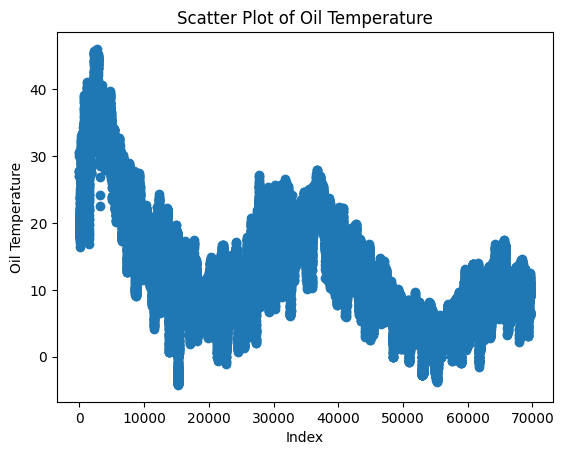

In [24]:


# Scatter plot to visualize outliers
plt.scatter(train.index, train['OT'])
plt.xlabel('Index')
plt.ylabel('Oil Temperature')
plt.title('Scatter Plot of Oil Temperature')
plt.show()


checking z-scores to find the number of outliers

In [25]:


# Calculate Z-scores
z_scores = stats.zscore(train['OT'].dropna())  # Calculate Z-scores
abs_z_scores = np.abs(z_scores)
train['z_score'] = abs_z_scores
train['outlier'] = (abs_z_scores > 3.1)  # Common threshold is 3

# Display outliers
outliers = train[train['outlier']]
print(outliers)


                    date    HUFL   HULL   MUFL   MULL   LUFL   LULL  \
1114 2016-07-12 14:30:00   9.377  1.942  6.219  0.888  2.772  1.097   
1119 2016-07-12 15:45:00   8.573  1.875  5.934  0.391  2.619  1.401   
1120 2016-07-12 16:00:00   8.774  1.942  6.112  0.462  2.711  1.127   
1121 2016-07-12 16:15:00   8.975  2.076  6.148  0.533  2.833  1.127   
1122 2016-07-12 16:30:00   9.109  2.545  6.610  1.421  2.955  1.188   
...                  ...     ...    ...    ...    ...    ...    ...   
3042 2016-08-01 16:30:00  12.793  2.344  8.599  0.462  4.082  1.310   
3125 2016-08-02 13:15:00  13.865  1.808  9.417  0.000  4.508  1.371   
3512 2016-08-06 14:00:00   9.913  4.086  7.462  2.665  2.894  1.036   
3515 2016-08-06 14:45:00   9.779  4.756  6.965  2.559  2.955  1.005   
3518 2016-08-06 15:30:00   9.779  4.086  6.929  2.559  2.863  1.097   

             OT   z_score  outlier  OT_imputed  OT_new  
1114  39.887001  3.102135     True      11.361     0.0  
1119  40.098000  3.126771     Tru

Ignoring a small proportion of outliers is often a practical decision when the impact on the dataset as a whole is minimal.

In [27]:
num_outliers = train['outlier'].sum()
num_outliers

446

converting to parquet file for Faster Read/Write Operations

In [28]:
train.to_parquet('D:/ashutosh_adaptready/train.parquet')
test.to_parquet('D:/ashutosh_adaptready/test.parquet')